In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
data.columns=['Month','Sales']
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
data.shape

(107, 2)

In [7]:
data.isnull().sum()

Month    1
Sales    2
dtype: int64

In [8]:
data.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [9]:
data=data.dropna()

In [10]:
data.shape

(105, 2)

In [11]:
data.dtypes

Month     object
Sales    float64
dtype: object

In [12]:
data['Month']=pd.to_datetime(data['Month'])

In [13]:
data.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
data.set_index('Month',inplace=True)

In [15]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [16]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


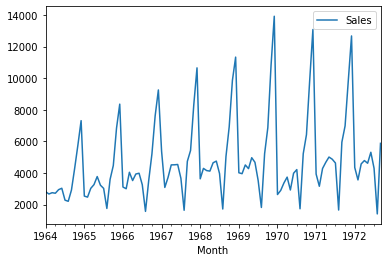

In [17]:
data.plot()

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
adfuller(data['Sales'])

(-1.8335930563276197,
 0.3639157716602465,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF test Statistic','p-value','Lags used','number of obs used']
    for value,label in zip(result,labels):
        print('{} : {}'.format(label,value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, rejected null hypothesis, & data is stationery')
    else:
        print("Weak evidence against null hypothesis, Accept null hypothesis, & data is not stationery'")

In [21]:
adfuller_test(data['Sales'])

ADF test Statistic : -1.8335930563276197
p-value : 0.3639157716602465
Lags used : 11
number of obs used : 93
Weak evidence against null hypothesis, Accept null hypothesis, & data is not stationery'


#### Data is stationery

In [22]:
data['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [23]:
data['Sales first diff']=data['Sales']-data['Sales'].shift(1)

In [24]:
data.head()

,Sales,Sales first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [25]:
data['Seasonal Sales diff']=data['Sales']-data['Sales'].shift(12)

In [26]:
data.head()

,Sales,Sales first diff,Seasonal Sales diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [27]:
adfuller_test(data['Sales first diff'].dropna())

ADF test Statistic : -7.189896448051024
p-value : 2.5196204473867414e-10
Lags used : 11
number of obs used : 92
Strong evidence against null hypothesis, rejected null hypothesis, & data is stationery


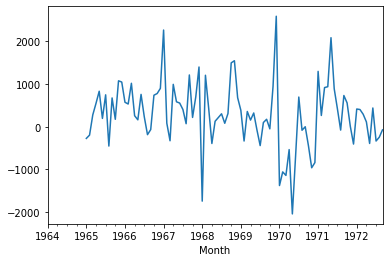

In [28]:
data['Seasonal Sales diff'].plot()

In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [33]:
import matplotlib.pyplot as plt

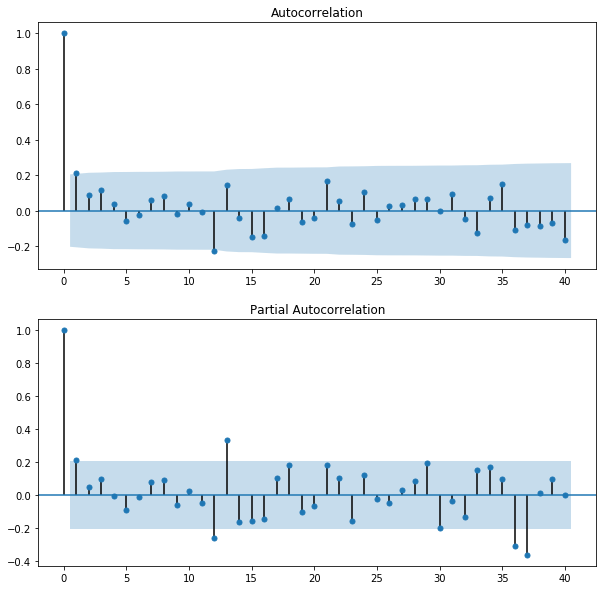

In [35]:
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(211)
fig=plot_acf(data['Seasonal Sales diff'].iloc[13:],ax=ax1,lags=40)
ax2=fig.add_subplot(212)
fif=plot_pacf(data['Seasonal Sales diff'].iloc[13:],ax=ax2,lags=40)

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model=ARIMA(data['Sales'],order=(1,1,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [38]:
model=model.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Thu, 02 Sep 2021   AIC                           1910.251
Time:                        23:51:41   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7842     12.405      1.837      0.066      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
data['forcast']=model.predict(start=14,end=25,dynamic=True)

In [44]:
data.head(25)

,Sales,Sales first diff,Seasonal Sales diff,forcast
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN


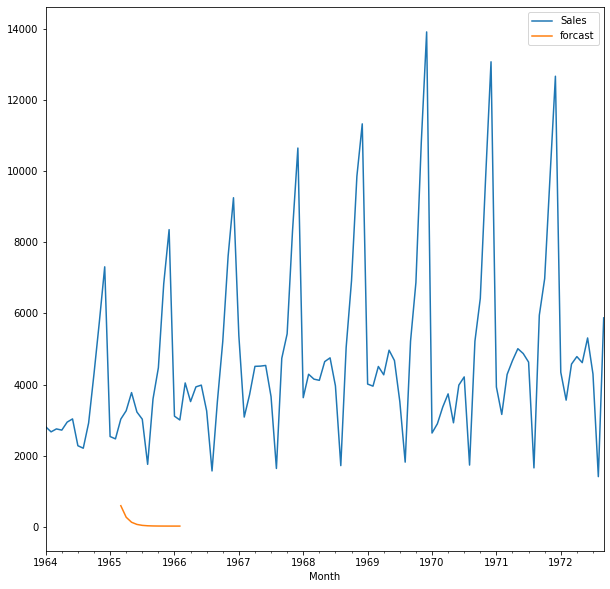

In [45]:
data[['Sales','forcast']].plot(figsize=(10,10))

In [46]:
import statsmodels.api as sm

In [47]:
model1=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [48]:
result=model1.fit()

In [49]:
data['forcast_SARIMAX']=result.predict(start=14,end=25,dynamic=True)

In [50]:
data.head(25)

,Sales,Sales first diff,Seasonal Sales diff,forcast,forcast_SARIMAX
Month,,,,,
1964-01-01,2815.0,NaN,NaN,NaN,NaN
1964-02-01,2672.0,-143.0,NaN,NaN,NaN
1964-03-01,2755.0,83.0,NaN,NaN,NaN
1964-04-01,2721.0,-34.0,NaN,NaN,NaN
1964-05-01,2946.0,225.0,NaN,NaN,NaN
1964-06-01,3036.0,90.0,NaN,NaN,NaN
1964-07-01,2282.0,-754.0,NaN,NaN,NaN
1964-08-01,2212.0,-70.0,NaN,NaN,NaN
1964-09-01,2922.0,710.0,NaN,NaN,NaN


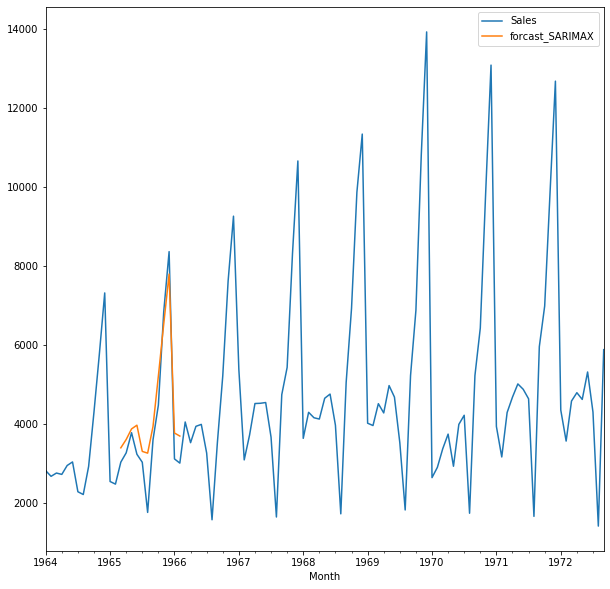

In [51]:
data[['Sales','forcast_SARIMAX']].plot(figsize=(10,10))

In [52]:
from pandas.tseries.offsets import DateOffset

In [54]:
future_dates=[data.index[-1] + DateOffset(months=x)for x in range(0,24)]

In [55]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [57]:
future_dataset=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [58]:
future_dataset.head()

,Sales,Sales first diff,Seasonal Sales diff,forcast,forcast_SARIMAX
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN


In [62]:
future_data=pd.concat([data,future_dataset])

In [63]:
future_data.shape

(128, 5)

In [64]:
future_data['forcast_SARIMAX1']=result.predict(start=104,end=124,dynamic=True)

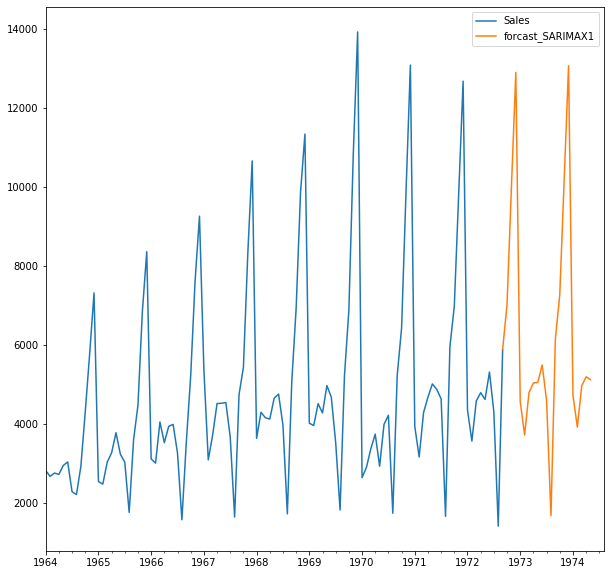

In [65]:
future_data[['Sales','forcast_SARIMAX1']].plot(figsize=(10,10))